In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('classifymail.csv', encoding="latin-1")
data.head()

,ï»¿Class,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,prsnl,"Hi [Name], just wanted to say hello and check ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,prsnl,I hope this message finds you well. I've been ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,prsnl,Happy birthday! Hope you have an amazing day f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,prsnl,Thanks for being such a great friend. I really...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data['ï»¿Class'].unique()

array(['prsnl', nan, 'otp', 'health', 'promo', 'trans'], dtype=object)

In [4]:
data.columns

Index(['ï»¿Class', 'Message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [5]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'
          ,'Unnamed: 10','Unnamed: 11'], axis=1, inplace=True)

In [6]:
data.head()

,ï»¿Class,Message
0,prsnl,"Hi [Name], just wanted to say hello and check ..."
1,prsnl,I hope this message finds you well. I've been ...
2,prsnl,Happy birthday! Hope you have an amazing day f...
3,prsnl,Thanks for being such a great friend. I really...
4,NaN,NaN


In [7]:
data.dropna(inplace = True)

In [8]:
data['ï»¿Class'].unique()

array(['prsnl', 'otp', 'health', 'promo', 'trans'], dtype=object)

In [9]:
data

,ï»¿Class,Message
0,prsnl,"Hi [Name], just wanted to say hello and check ..."
1,prsnl,I hope this message finds you well. I've been ...
2,prsnl,Happy birthday! Hope you have an amazing day f...
3,prsnl,Thanks for being such a great friend. I really...
5,prsnl,I miss you and can't wait until we can hang ou...
...,...,...
439,trans,Your account has been credited with a cashback...
440,trans,We are pleased to inform you that your applica...
441,trans,Your account has been temporarily locked due t...
442,trans,Please make a deposit to your account to avoid...


In [10]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [11]:
data['ï»¿Class'] = lb.fit_transform(data['ï»¿Class'])

In [12]:
data['ï»¿Class'].unique()

array([3, 1, 0, 2, 4])

In [13]:
data.head()

,ï»¿Class,Message
0,3,"Hi [Name], just wanted to say hello and check ..."
1,3,I hope this message finds you well. I've been ...
2,3,Happy birthday! Hope you have an amazing day f...
3,3,Thanks for being such a great friend. I really...
5,3,I miss you and can't wait until we can hang ou...


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X=data['Message']
y=data['ï»¿Class']

In [17]:
cv=CountVectorizer()
X=cv.fit_transform(X)

In [18]:
x_train, x_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
x_train.shape

(309, 1220)

In [20]:
x_test.shape

(78, 1220)

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
model=MultinomialNB()

In [23]:
model.fit(x_train, y_train)

MultinomialNB()

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
model.score(x_test, y_test)

1.0

In [26]:
y_pred = model.predict(x_test)

In [27]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0],
       [ 0,  0, 18,  0,  0],
       [ 0,  0,  0, 18,  0],
       [ 0,  0,  0,  0, 17]], dtype=int64)

<AxesSubplot:>

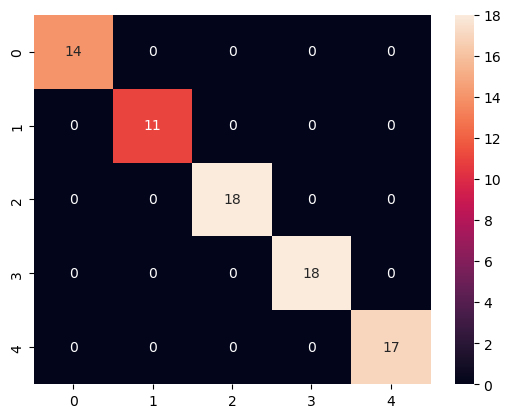

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
a = accuracy_score(y_test,y_pred)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        17

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



In [33]:
msg="You Won 500$"
data = [msg]
vect = cv.transform(data).toarray()
my_prediction = model.predict(vect)

In [34]:
vect

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
import pickle
pickle.dump(model, open('spam.pkl','wb'))
model1 = pickle.load(open('spam.pkl','rb'))

In [36]:
from win32com.client import Dispatch

In [37]:
def speak(text):
	speak=Dispatch(("SAPI.SpVoice"))
	speak.Speak(text)

In [38]:
def result(msg):
    data = [msg]
    vect = cv.transform(data).toarray()
    my_prediction = model1.predict(vect)
    if my_prediction[0]==1:
        speak("This is a Spam mail")
        print("This is a Spam mail")
    else:
        speak("This is not a Spam mail")
        print("This is not a Spam mail")

In [39]:
import tkinter as tk

In [40]:
from tkinter import *
root=tk.Tk()
root.geometry("200x200")
l2=tk.Label(root, text="Email Spam Classification Application",font=('Vardana',20),height=2,width=60,bg='red',fg='yellow')
l2.pack(padx=20,pady=20)
l1=tk.Label(root, text="Enter Your Message:",font=('Vardana',20),height=2,width=60,bg='#27285C')
l1.pack(padx=20,pady=20)
text=tk.Entry(root,width=50,font=('Helvettica',25))
text.pack(padx=20,pady=20)
root.configure(bg='#27285C')

def result():
    data = [text.get()]
    vect = cv.transform(data).toarray()
    my_prediction = model1.predict(vect)
    if my_prediction[0]==1:
        speak("This is a otp mail")
         #print("This is a otp mail")
        l3=tk.Label(root, text="This is a otp mail")
        l3.pack()
    elif my_prediction[0]==2:
        speak("This is a promo mail")
         #print("This is a promo mail")
        l3=tk.Label(root, text="This is a promo mail")
        l3.pack()
    elif my_prediction[0]==3:
        speak("This is a personal mail")
        #print("This is a personal mail")
        l3=tk.Label(root, text="This is a personal mail")
        l3.pack()
        
    elif my_prediction[0]==4:
        speak("This is a transation mail")
         #print("This is a transaction mail")
        l3=tk.Label(root, text="This is a transation mail")
        l3.pack()
    else:
        speak("This is a health  mail")
        #print("This is a health mail")
        l3=tk.Label(root, text="This is a health mail")
        l3.pack()


B=tk.Button(root, text="Classify", command=result)
B.pack(pady=20)
l2=tk.Label(root, text="Designed By Harshit & Austin ©",font=('Vardana',10),height=1,width=25,bg='#03e3fc')
l2.pack(padx=20,pady=20)

root.mainloop()